In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

mse = mean_squared_error(y_test, y_test_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=y_test_pred)

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n")

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

print("\n")

Defining the intercept of the polynomial line and coefficient values for x1, x2 ... xn.

In [ ]:
ridge_regression.intercept_
ridge_regression.coef_

Given:

    y = a + b1x1 + b2x2 + b3x3 + b4x4
    

This tells me the prediction for the target output variable, y, based on the input variables specified and using ridge regression giving the value of C$37,990.99.

## Model Validation Metrics
Now to measure the error score and accuracy of the line of fit.

## Applying Regularization
To avoid overfitting regularization can be applied, but will require tuning hyperparameters manually to an extent. To see if I can improve on the linear regression model's ability to predict the target variable, I have decided to use Ridge Regression.
This regularization term basically employs the use of a penalization method by summing the squared values of each coefficient (whether positive or negative) and helps balance the contribution of all the features but this term is only used during the training phase so I need to remove it for the purpose of testing and evaluation.

## Model Selection
### Ridge Regression
Trying a slightly different type of regression model using the alpha learning rate hyperparameter of 1.0 to see if I can reduce the (rmse) error value and increase the (r2) accuracy score. The purpose of using a ridge regression model is to try to reduce or eliminate the coefficient values of all the various features (especially those with high multi-colinearity between predictors) and will increase bias slightly but should decrease variance significantly. Ridge regression achieves this by assigning equal weights to those coefficient values which have high colinearity.

In [ ]:
# instantiate model
ridge_regression = linear_model.Ridge(alpha=1.0)

# fit model
ridge_regression.fit(X_train, y_train)

The regularization term should only be added to the cost function during the training phase. Now the 'training' data has been fit, it becomes important to discover the performance measure on the unregularized test set. Making a prediction on the first 5 values in the test set first.

In [ ]:
price_predictions = ridge_regression.predict(X_test)
print("Predictions: ", ridge_regression.predict(X_test.iloc[:5]))

This tells me the prediction for the target output variable, y, based on the input variables specified and using ridge regression giving the value of C$37,990.99.

## Model Validation Metrics¶
Now to measure the error score and accuracy of the line of fit.

This new data matrix containing the additional features with the squared values has been created by expanding the number of features and the parameter weights (or coefficients) which represent a quadratic equation. The linear regression model should now be applied again to this newly expanded dataframe containing the polynomial features.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, price_predictions)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=price_predictions)

In [ ]:
print("R-squared: ", ridge_regression.score(X_test, y_test))

Producing a scatter plot of the data points to display actual vs predicted prices and the regression line of best fit.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, price_predictions)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=price_predictions)

In [ ]:
print(ridge_regression.intercept_)
print(ridge_regression.coef_)

This is a slight improvement on the original R-squared score and I can see that the RMSE hasn't really changed.
Trying to improve on the scores above, I decided to introduce a Polynomial model which should be able to fit the line more accurately to the data points.

## Using a Pipeline
The next method involves placing the expanded polynomial features and linear regression of these within a pipeline which can be trained and used to predict the target variable.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
print(y_train_pred)

Next I wanted to find the shape of the matrices involved and now these datasets have been expanded by the polynomial model I want to make sure they have the same dimensions (m.n) otherwise the polynomial regression won't work.

In [ ]:
print(X_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
print(y_train_pred.shape)

In [ ]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# print the RMSE metric and R2 accuracy score
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The metrics from using the 2nd order quadratic coefficients and terms on the training set, a significant improvement.

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_test, y_test)
y_test_pred = pipeline.predict(X_test)
print(y_test_pred)

The metrics from generalizing to the test set data for the quadratic equation.

In [ ]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# print the RMSE metric and R2 accuracy score
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
print(y_train_pred)

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# print the RMSE metric and R2 accuracy score
print("\n")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

In [ ]:
print(X_test.shape)

In [ ]:
print(y_test.shape)

In [ ]:
print(y_test_pred.shape)

Applying the same model to the test set only for validation:

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_test, y_test)
y_test_pred = pipeline.predict(X_test)
print(y_test_pred)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# print the RMSE metric and R2 accuracy score
print("\n")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

# Model Evaluation
So the fit of the regression forecast line to the data has increased in its accuracy marginally with the degree of fit (or expansion of terms) and the RMSE has reduced fairly considerably. The R-squared accuracy appears to increase with smaller sets of data such as the test sets overall.

Ridge regression rmse score = 689.1925582115692
R-squared accuracy = 0.9991392014478754

So I can determine the use of ridge regression to regularize the model has produced a slight increase in overall variance but also a slight increase in bias of output prediction. Ridge regression should reduce the variance and if not, I probably need to adjust the 'degrees of freedom' hyperparameter for the cost function for the Polynomial model which feeds into it, or tune the 'alpha' hyperparameter in the actual ridge regression model itself. Tuning these inputs ...........

I have decided to see if I can improve the model's predictive power by electing to use a Decision Tree Regression model: "https://github.com/lynstanford/machine-learning-projects/tree/master/machine-learning/decision_tree.ipynb".

# Print dependencies
Dependencies are fundamental to record the **computational environment**.   

- Use [watermark](https://github.com/rasbt/watermark) to print version of python, ipython, and packages, and characteristics of the computer

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,tarfile,urllib3,matplotlib,seaborn,sklearn,pickle5

# date
print (" ")
%watermark -u -n -t -z 

# Template

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# The training set
datapoints = np.array([
    [12.5,70,81.32], [25,70,88.54], [37.5,70,67.58], [50,70,55.32], 
    [62.5,70,56.84], [77,70,49.52], [0,11.5,71.32], [77,57.5,67.20], 
    [0,23,58.54], [25,46,51.32], [37.5,46,49.52], [0,34.5,63.22], 
    [25,34.5,48.32], [37.5,34.5,82.30], [50,34.5,56.42], [77,34.5,48.32], 
    [37.5,23,67.32], [0,46,64.20], [77,11.5,41.89], [77,46,55.54], 
    [77,23,52.22], [0,57.5,93.72], [0,70,98.20], [77,0,42.32]
    ])
X = datapoints[:,0:2]
Y = datapoints[:,-1]

# 5 degree polynomial features
deg_of_poly = 5
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

# The test set, or plotting set
N = 20
Length = 70
predict_x0, predict_x1 = np.meshgrid(np.linspace(0, Length, N), 
                                     np.linspace(0, Length, N))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), 
                            predict_x1.reshape(-1, 1)), 
                           axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

# Plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(datapoints[:, 0], datapoints[:, 1], datapoints[:, 2], c='b', marker='o')

ax1.set_xlim((70, 0))
ax1.set_ylim((0, 70))
fig.colorbar(surf, ax=ax1)
ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape))
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)
plt.show()

In [ ]:
# for polynomial regression
y_train_pred = a + b1x1 + b2x2 + b3x3 + b4x4 + (b5x1)**2 + (b6x2)**2 + (b7x3)**2 + (b8x4)**2 + b9x1*x2 + b10x1*x3 + b11x1*x4 + b12x2*x3 + b13x2*x4 + b14x3*x4
a = 
error = y_train - y_train_pred
mse = np.sum(error)**2
rmse = np.sqrt(mse)

y_train = lin_reg.fit(y_train)
y_train_pred = lin_reg.predict(y_train)

def mse_train():
    for i in range(1, 362):
        i += 1
    
    error = y_train - y_pred
    mse_train = sum(i * (error)**2)
mse_train

# Cross-Validation with Linear Regression
This notebook demonstrates how to do cross-validation (CV) with linear regression as an example (it is heavily used in almost all modelling techniques such as decision trees, SVM etc.). We will mainly use sklearn to do cross-validation.

This notebook is divided into the following parts:

## Experiments to understand overfitting
Building a linear regression model without cross-validation
Problems in the current approach
Cross-validation: A quick recap
Cross-validation in sklearn:
4.1 K-fold CV
4.2 Hyperparameter tuning using CV
4.3 Other CV schemes
0. Experiments to Understand Overfitting
In this section, let's quickly go through some experiments to understand what overfitting looks like. We'll run some experiments using polynomial regression.

In [57]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [58]:
# import Housing.csv
housing = pd.read_csv('C:/Users/lynst/Documents/Datasets/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


To find the total number of observations.

In [59]:
# number of observations 
len(housing.index)

545

For the first experiment, we'll do regression with only one feature. Let's filter the data so it only contains area and price.

In [60]:
# filter only area and price
df = housing.loc[:, ['area', 'price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [61]:
# re-scaling the variables (both)
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# rename columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


<AxesSubplot:xlabel='area', ylabel='price'>

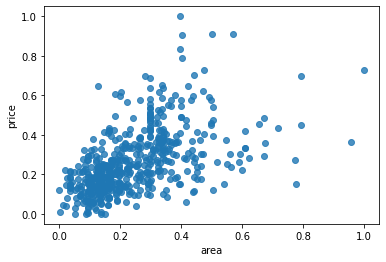

In [62]:
# visualise area-price relationship
sns.regplot(x="area", y="price", data=df, fit_reg=False)

In [63]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

381
164


In [64]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['area']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['price']

X_test = df_test['area']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['price']

## Polynomial Regression
You already know simple linear regression:

y=β0+β1x1 

In polynomial regression of degree  n , we fit a curve of the form:

y=β0+β1x1+β2x21+β3x31...+βnxn1 

In the experiment below, we have fitted polynomials of various degrees on the housing data and compared their performance on train and test sets.

In sklearn, polynomial features can be generated using the PolynomialFeatures class. Also, to perform LinearRegression and PolynomialFeatures in tandem, we will use the module sklearn_pipeline - it basically creates the features and feeds the output to the model (in that sequence).

In [65]:
len(X_train)

381

Let's now predict the y labels (for both train and test sets) and store the predictions in a table. Each row of the table is one data point, each column is a value of  n  (degree).


    degree-1	 degree-2	 degree-3	 ...	 degree-n

x1

x2

x3

...

xn



In [66]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

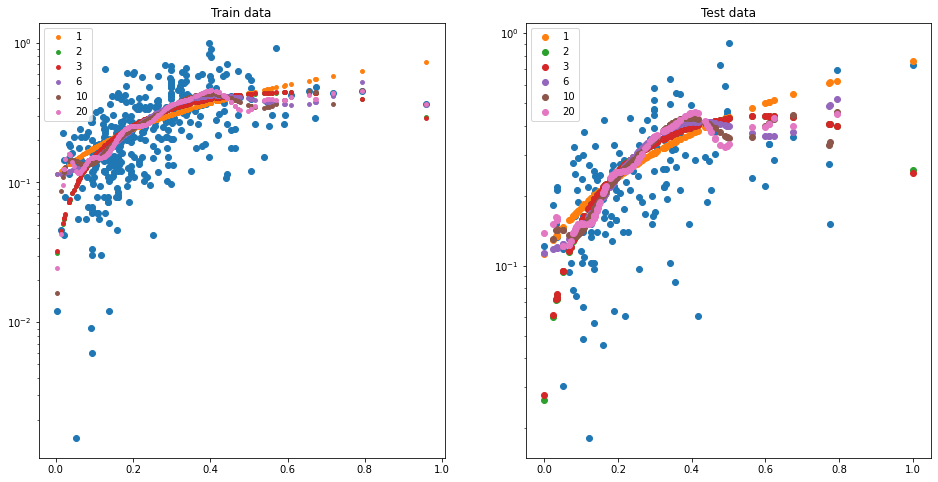

In [67]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [68]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.29, test score=0.25
Polynomial degree 2: train score=0.34, test score=0.22
Polynomial degree 3: train score=0.34, test score=0.22
Polynomial degree 6: train score=0.36, test score=0.11
Polynomial degree 10: train score=0.37, test score=-108.76
Polynomial degree 20: train score=0.38, test score=-307071892461.64


## 1. Building a Model Without Cross-Validation
Let's now build a multiple regression model. First, let's build a vanilla MLR model without any cross-validation etc.

In [69]:
# data preparation

# list of all the "yes-no" binary categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# applying the function to the housing variables list
housing[binary_vars_list] = housing[binary_vars_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [70]:
# 'dummy' variables
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [71]:
# concat the dummy variable df with the main df
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [72]:
# 'furnishingstatus' since we alreday have the dummy vars
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Splitting Into Train and Test

In [73]:
# train-test 70-30 split
df_train, df_test = train_test_split(housing, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [74]:
# apply rescaling to the test set also
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


In [75]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

Note that we haven't rescaled the test set yet, which we'll need to do later while making predictions.

### Using RFE
Now, we have 13 predictor features. To build the model using RFE, we need to tell RFE how many features we want in the final model. It then runs a feature elimination algorithm.

Note that the number of features to be used in the model is a hyperparameter.

In [76]:
# num of max features
len(X_train.columns)

13

In [77]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [78]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [79]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5812051458999572


In [80]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.535044502757882


## 2. Problems in the Current Approach
In train-test split, we have three options:

Simply split into train and test: But that way tuning a hyperparameter makes the model 'see' the test data (i.e. knowledge of test data leaks into the model)
Split into train, validation, test sets: Then the validation data would eat into the training set
Cross-validation: Split into train and test, and train multiple models by sampling the train set. Finally, just test once on the test set.
## 3. Cross-Validation: A Quick Recap
The following figure illustrates k-fold cross-validation with k=4. There are some other schemes to divide the training set, we'll look at them briefly later.

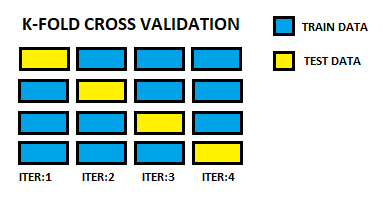

## 4. Cross-Validation in sklearn
Let's now experiment with k-fold CV.

### 4.1 K-Fold CV

In [81]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores 

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [82]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

In [83]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00806336, -0.00658776, -0.0064797 , -0.0070743 , -0.01523682])

### 4.2 Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

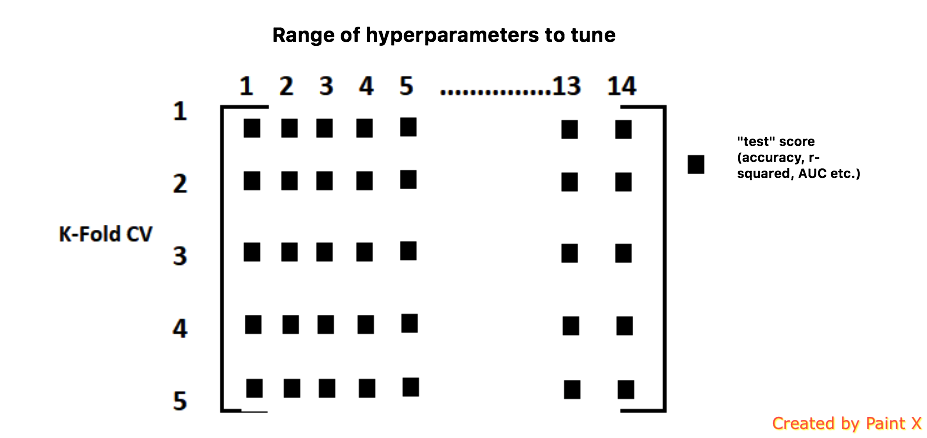



In [84]:
# number of features in X_train
len(X_train.columns)

13

In [85]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring = 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [86]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020524,0.007329,0.002533,0.002174,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,...,0.243658,0.077627,13,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.033699,0.010199,0.008126,0.005956,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438360,0.058374,12,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.021941,0.007687,0.003134,0.006267,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,...,0.516805,0.059902,11,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
3,0.018204,0.005090,0.009678,0.007920,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,...,0.526272,0.053074,10,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296
4,0.025580,0.007026,0.006244,0.007647,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,...,0.541889,0.049257,8,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847
5,0.026876,0.006830,0.003990,0.006584,6,{'n_features_to_select': 6},0.512477,0.628849,0.488411,0.527379,...,0.541063,0.048029,9,0.626959,0.603122,0.596348,0.606852,0.601063,0.606869,0.010602
6,0.014697,0.002357,0.002726,0.002955,7,{'n_features_to_select': 7},0.568887,0.664093,0.552385,0.534634,...,0.577636,0.045006,7,0.658577,0.638501,0.630137,0.646285,0.638313,0.642363,0.009582
7,0.006926,0.008548,0.003337,0.006186,8,{'n_features_to_select': 8},0.570639,0.665608,0.592323,0.550001,...,0.591795,0.039428,6,0.674146,0.640825,0.654028,0.658665,0.657277,0.656988,0.010651
8,0.007745,0.005268,0.004232,0.007062,9,{'n_features_to_select': 9},0.578843,0.694189,0.606220,0.590777,...,0.615352,0.040767,4,0.676043,0.652605,0.659579,0.668996,0.664321,0.664309,0.007988
9,0.010493,0.006104,0.000821,0.001206,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.594335,...,0.608547,0.043498,5,0.686032,0.661729,0.674558,0.678443,0.677153,0.675583,0.007910


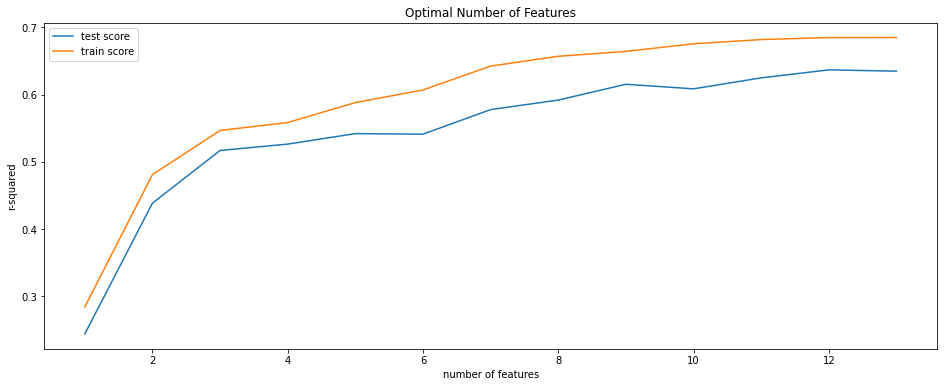

In [87]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Now we can choose the optimal value of number of features and build a final model.

In [88]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5995575338728532


Notice that the test score is very close to the 'mean test score' on the k-folds (about 60%). In general, the mean score estimated by CV will usually be a good estimate of the test score.

## Another Example: Car Price Prediction

In [89]:
# reading the dataset
cars = pd.read_csv("C:/Users/lynst/Documents/Datasets/CarPrice_Assignment.csv")

In [90]:
# All data preparation steps in this cell

# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')


# create new column: car_company
p = re.compile(r'\w+-?\w+')
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])


# replacing misspelled car_company names
# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'
# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'
# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'
# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'
# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'


# drop carname variable
cars = cars.drop('CarName', axis=1)

# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]
y = cars['price']


# creating dummy variables for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()


# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)


# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)


# rescale the features
cols = X.columns

X = pd.DataFrame(scale(X))
X.columns = cols


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

NameError: name 're' is not defined

In [91]:
# number of features
len(X_train.columns)

13

In [92]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [93]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026616,0.012474,0.002963,0.004721,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438360,0.058374,38,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
1,0.029266,0.003120,0.000401,0.000801,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,...,0.516805,0.059902,37,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
2,0.020315,0.005836,0.006273,0.007683,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,...,0.526272,0.053074,36,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296
3,0.025311,0.007930,0.009404,0.007679,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,...,0.541889,0.049257,34,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847
4,0.027644,0.005883,0.006528,0.007578,6,{'n_features_to_select': 6},0.512477,0.628849,0.488411,0.527379,...,0.541063,0.048029,35,0.626959,0.603122,0.596348,0.606852,0.601063,0.606869,0.010602
5,0.019182,0.006098,0.009390,0.007667,7,{'n_features_to_select': 7},0.568887,0.664093,0.552385,0.534634,...,0.577636,0.045006,33,0.658577,0.638501,0.630137,0.646285,0.638313,0.642363,0.009582
6,0.012245,0.007278,0.006371,0.005299,8,{'n_features_to_select': 8},0.570639,0.665608,0.592323,0.550001,...,0.591795,0.039428,32,0.674146,0.640825,0.654028,0.658665,0.657277,0.656988,0.010651
7,0.012501,0.006250,0.000000,0.000000,9,{'n_features_to_select': 9},0.578843,0.694189,0.606220,0.590777,...,0.615352,0.040767,30,0.676043,0.652605,0.659579,0.668996,0.664321,0.664309,0.007988
8,0.004082,0.008163,0.002907,0.004876,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.594335,...,0.608547,0.043498,31,0.686032,0.661729,0.674558,0.678443,0.677153,0.675583,0.007910
9,0.003053,0.003750,0.005173,0.006084,11,{'n_features_to_select': 11},0.578083,0.707264,0.608905,0.621282,...,0.624864,0.043599,29,0.689850,0.669391,0.683932,0.683890,0.682286,0.681870,0.006752


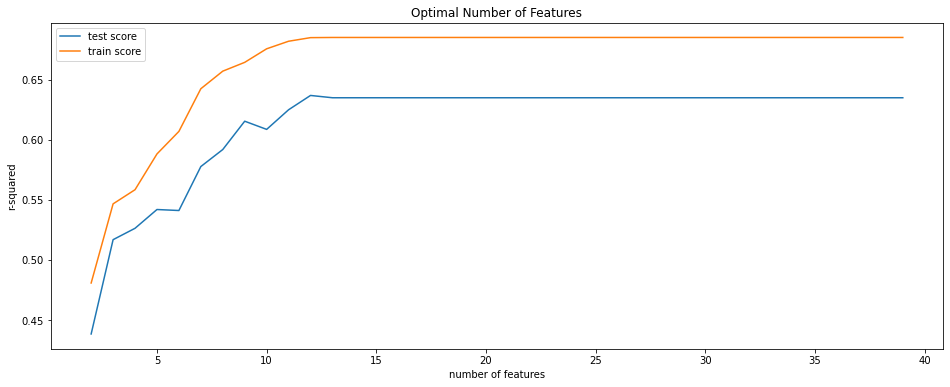

In [94]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

## 4.3 Types of Cross-Validation Schemes

1. K-Fold cross-validation: Most common
2. Leave One Out (LOO): Takes each data point as the 'test sample' once, and trains the model on the rest n-1 data points. Thus, it trains n total models.
* Advantage: Utilises the data well since each model is trained on n-1 samples
* Disadvantage: Computationally expensive
3. Leave P-Out (LPO): Creat all possible splits after leaving p samples out. For n data points, there are (nCp) possibile train-test splits.
4. (For classification problems) Stratified K-Fold: Ensures that the relative class proportion is approximately preserved in each train and validation fold. Important when ther eis huge class imbalance (e.g. 98% good customers, 2% bad).
### Additional Reading
The sklearn documentation enlists all CV schemes here.